# Homework 1

Ben Smith

ECON 213R

9/19/18

First, I will call the three files that I will use.

"csvfile" comes from https://fred.stlouisfed.org/series/UNRATE/,
"xlsxfile" comes from https://data.bls.gov/timeseries/LNS14000000, and
"txtfile" comes from a csv file downloaded from https://crime-data-explorer.fr.cloud.gov/downloads-and-docs, under "Arrest Data"

In [669]:
#Import necessary libraries
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas.util.testing as tm; tm.N = 3
import time

sns.set(style='ticks', palette='Set2')
%matplotlib inline

wrkdir = 'C:/Users//Ben Smith//Downloads'

os.chdir(wrkdir)

#Assign dataframes for each file
csvfile = pd.read_csv('UNRATE (6).csv') #from FRED
xlsxfile = pd.read_excel('unemp_bls.xlsx') #from BLS
txtfile = pd.read_csv('arrests_national.txt', sep="\t", header=None) #csv from FBI, then saved as txt

Now, I will look at each of my files.

In [670]:
csvfile[:3]

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0


In [671]:
xlsxfile[:3]

,Labor Force Statistics from the Current Population Survey,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Original Data Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,LNS14000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [672]:
txtfile[:3]

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,id,year,population,total_arrests,homicide,rape,robbery,aggravated_assault,burglary,larceny,...,gambling,against_family,dui,liquor_laws,drunkenness,disorderly_conduct,vagrancy,other,suspicion,curfew_loitering
1,1,2016,323127513,10662252,11788,23632,95754,383977,207325,1050058,...,3705,88748,1017808,234899,376433,369733,24851,3254871,576,34176
2,2,2015,320896618,10797088,11092,22863,95572,376154,216010,1160390,...,4825,94837,1089171,266250,405880,386078,25151,3218880,1389,44802


Now, I will begin to work with each of my files, one after the other. I begin with "csvfile."

### Cleaning The CSV File

I start by cleaning "csvfile." It actually looks pretty clean, so what I'll do is separate the "Date" variable into year, month, and day.

In [673]:
#Here, I'm creating a function that splits the Date variable into year, month, and day for any files formatted like the csv file
def date_splitter(file):     
    file['year'] = file.DATE.str.split('-').str[0]
    file['month'] = file.DATE.str.split('-').str[1]
    file['day'] = file.DATE.str.split('-').str[2]
    
    return file

In [674]:
#Here, I'm using the above function to create columns on the csv file with values for the years, months, and days

csvfile = date_splitter(csvfile)

print(csvfile['year'][:3])
print(csvfile['month'][:3])
print(csvfile['day'][:3])

print(csvfile[:3])

0    1948
1    1948
2    1948
Name: year, dtype: object
0    01
1    02
2    03
Name: month, dtype: object
0    01
1    01
2    01
Name: day, dtype: object
         DATE  UNRATE  year month day
0  1948-01-01     3.4  1948    01  01
1  1948-02-01     3.8  1948    02  01
2  1948-03-01     4.0  1948    03  01


In [675]:
#I want to find outliers among the unemployment rates my csv file has

#Let's see summary statistics

csvfile.describe()

,UNRATE
count,848.000000
mean,5.772642
std,1.636531
min,2.500000
25%,4.600000
50%,5.600000
75%,6.800000
max,10.800000


The min and max values look reasonable. Let's see what a box-and-whisker plot would look like for this data

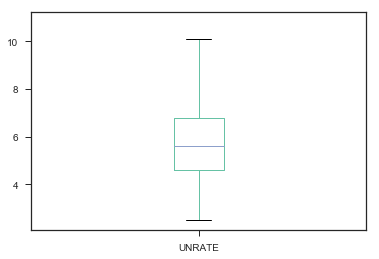

In [676]:
bbox = csvfile['UNRATE'].plot(kind="box")

In [677]:
#Let's see if there are any missing values

csvfile.columns[csvfile.isnull().any()]

Index([], dtype='object')

There aren't any! 

This data looks pretty clean, so I will use it to answer a question.

My question: is there a correlation between month and unemployment?

In [678]:
#First, lets convert days, months, and years into integers (they are in string format for some reason)

def to_num(obj):
    obj = pd.to_numeric(obj, errors='coerce')
    return obj

In [679]:
csvfile.day = to_num(csvfile.day)
csvfile.month = to_num(csvfile.month)
csvfile.year = to_num(csvfile.year)

#This command will give the correlation coefficient between month and unemployment

csvfile['UNRATE'].corr(csvfile['month'])

0.0058674138565444041

This correlation coefficient is quite small; a regression analysis will likely show that month has an insignificant effect on unemployment rates. Just for fun, let's see what the correlation would be between year and unemployment.

In [680]:
csvfile['UNRATE'].corr(csvfile['year'])

0.29468853426604247

Notice that unemployment is much more correlated with year than with month, which makes a lot of sense.

### Describing The CSV File

Now let's describe the data in our csv file.

In [681]:
csvfile.describe()

,UNRATE,year,month,day
count,848.000000,848.000000,848.000000,848.0
mean,5.772642,1982.834906,6.481132,1.0
std,1.636531,20.412421,3.450390,0.0
min,2.500000,1948.000000,1.000000,1.0
25%,4.600000,1965.000000,3.000000,1.0
50%,5.600000,1983.000000,6.000000,1.0
75%,6.800000,2000.250000,9.000000,1.0
max,10.800000,2018.000000,12.000000,1.0


Let's take a look at some other percentiles as well.

In [682]:
csvfile.describe(percentiles=[.01,.05,.95,.99])

,UNRATE,year,month,day
count,848.000000,848.000000,848.000000,848.0
mean,5.772642,1982.834906,6.481132,1.0
std,1.636531,20.412421,3.450390,0.0
min,2.500000,1948.000000,1.000000,1.0
1%,2.847000,1948.000000,1.000000,1.0
5%,3.500000,1951.000000,1.000000,1.0
50%,5.600000,1983.000000,6.000000,1.0
95%,9.000000,2015.000000,12.000000,1.0
99%,10.100000,2017.000000,12.000000,1.0
max,10.800000,2018.000000,12.000000,1.0


Notice that it only really makes sense to consider the above statistics with respect to the unemployment rate. But, I've included the above table for those interested in the statistics this file has for dates. Notice that "day" is always 1. This will make our next command interesting.

In [683]:
#Let's check out our correlation coefficient matrix
csvfile.corr()

,UNRATE,year,month,day
UNRATE,1.000000,0.294689,0.005867,NaN
year,0.294689,1.000000,-0.009432,NaN
month,0.005867,-0.009432,1.000000,NaN
day,NaN,NaN,NaN,NaN


Notice that there are no valid coefficients for "day." That's because, as we just saw, "day" has a standard deviation of 0. Recall from ECON 378 that correlation coefficients are calculated with standard deviations in the denominator. Thus, if the standard deviation of one variable is 0, then correlation is impossible to calculate.

Now let's create an indicator for whether the year is later or earlier than 1990. Then, we'll see how the summary statistics compare for the unemployment rate before and after 1990.

In [684]:
#This function will create the indicator just described for any file
def split_years(file, year):
    file['late'] = file['year'] >= year
    
    #Change "late" from boolean to an integer value
    file.late = file.late.astype(int)
    
    return file

In [685]:
#Divide the csvfile into before and after 1990
csvfile = split_years(csvfile, 1990)

#Check that "late" looks the way it should
print(csvfile['late'][:3])
print(csvfile['late'][-3:])

0    0
1    0
2    0
Name: late, dtype: int32
845    1
846    1
847    1
Name: late, dtype: int32


The beginning and end look good! I have checked further and all of "late" seems to look the way it should.

Now let's see what unemployment looks like before and after 1990.

In [686]:
csvfile.groupby('late')['UNRATE'].describe()

,count,mean,std,min,25%,50%,75%,max
late,,,,,,,,
0,504.0,5.657341,1.676627,2.5,4.3,5.6,6.800,10.8
1,344.0,5.941570,1.563035,3.8,4.7,5.6,6.825,10.0


Recall that "1" means after 1990 and "0" means before 1990. So, we see here that the mean unemployment rate has been higher since 1990, but the standard deviation has been lower. In fact, both the minimum and maximum were both before 1990. One particularly interesting observation is that the median (the 50th percentile) in both time periods is the same.

### Visualizing The CSV File

Now let's visualize our data in lots of different ways. We start with a scatter plot.

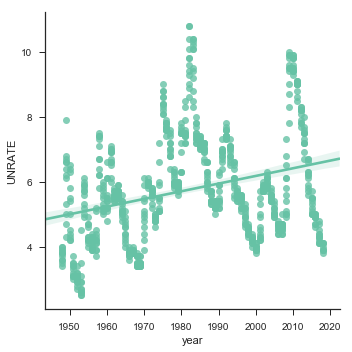

In [687]:
sns.lmplot(x="year", y="UNRATE", data=csvfile)

Wow! Isn't that cool? This scatter plot shows a well-defined cycle of rising and falling unemployment rates over the past 70 years. 

Using this plot, it is clear that the maximum unemployment rate attained in this dataset was in the 1980's and the minimum was in the 1950's. 

It is interesting that the fastest rise and the largest fall in unemployment in this data both appear to have come following to the Great Recession in 2008.

Also notice that the regression line has a positive slope. This begs the questions: will unemployment continue to rise on average, or will we be able to bring it back down? And, why has unemployment increased with time over the last several decades?

The slope may actually become negative if the data included the Great Depression, so more data might be nice. However, Keynes' theories changed public policy after the Great Depression. So, I would argue that this data is quite useful, since it offers a near-comprehensive look at trends in unemployment rates in the modern era of post-Depression policy.

Here are some more ways to visualize the data.

A histogram:

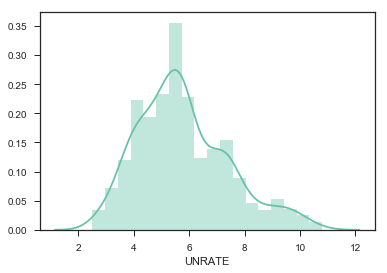

In [688]:
sns.distplot(csvfile.UNRATE, kde=True)

Here we see that the unemployment rate has most frequently fallen near 6% within the range of our dataset.

Here's a joint plot:

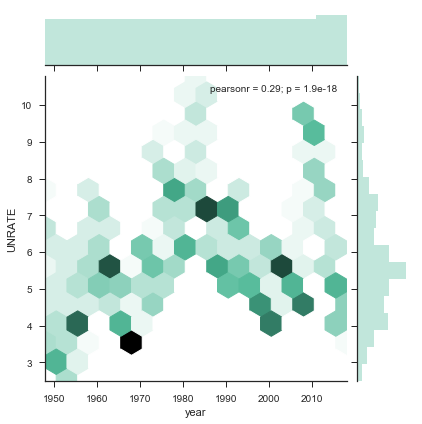

In [689]:
sns.jointplot(csvfile.year, csvfile.UNRATE, kind="hex")

This plot looks a lot like the scatter plot -- only using hexagons instead of dots.

Here's a line chart!

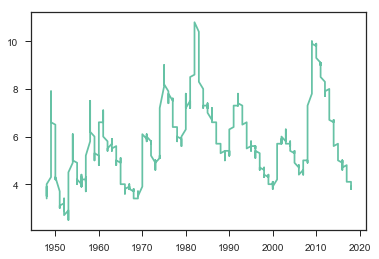

In [690]:
plt.plot(csvfile['year'],csvfile['UNRATE'])

This chart connects the dots from the scatter plot. That is useful because with the line chart, it becomes easier to quickly draw conclusions about time trends.

Last but not least, I present a heat map of unemployment over months and years.

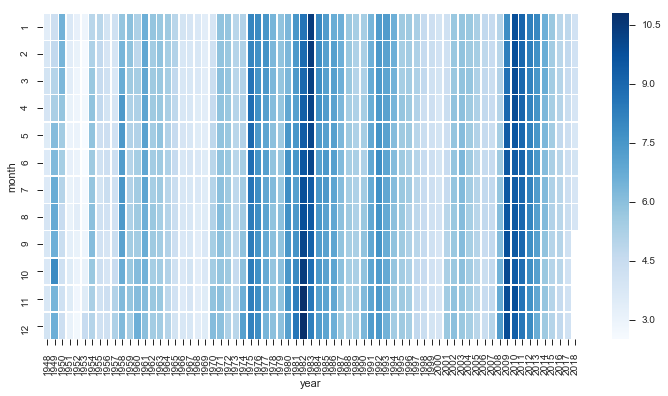

In [691]:
data = csvfile.pivot("month", "year", "UNRATE")

f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(data, annot=False, linewidths=.5, ax=ax, cmap='Blues')

Thus, I make an end to my analysis of the unemployment rates given over the last 70 years by the csv file I downloaded. We have found that the unemployment rate has followed a cycle of ups and downs over the years, but it seems to be increasing in average over time.

### Cleaning The XLSX File

I now commence my analysis of the xlsx file I downloaded, which also focuses on unemployment rates, although it is from a different source and only contains the past ten years. Will this file's results be similar to those we found from my last file? We'll find out.

We again start by cleaning the file. A quick survey of the numbers shows that there are no extreme outliers. Notice, however from the portion shown near the top of this file that the first several rows contain no data. We'll start by finding which rows we don't need and getting rid of them.

In [692]:
xlsxfile[:15]

,Labor Force Statistics from the Current Population Survey,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Original Data Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,LNS14000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Seasonally Adjusted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Series title:,(Seas) Unemployment Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Labor force status:,Unemployment rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Type of data:,Percent or rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Age:,16 years and over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Years:,2008 to 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like we don't need rows 0-9, and row 10 gives variables

In [693]:
#Drop rows 0-9

xlsxfile = xlsxfile.iloc[10:]
xlsxfile

,Labor Force Statistics from the Current Population Survey,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
10,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
11,2008,5,4.9,5.1,5,5.4,5.6,5.8,6.1,6.1,6.5,6.8,7.3
12,2009,7.8,8.3,8.7,9,9.4,9.5,9.5,9.6,9.8,10,9.9,9.9
13,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
14,2011,9.1,9,9,9.1,9,9.1,9,9,9,8.8,8.6,8.5
15,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
16,2013,8,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
17,2014,6.6,6.7,6.7,6.3,6.3,6.1,6.2,6.2,5.9,5.7,5.8,5.6
18,2015,5.7,5.5,5.5,5.4,5.5,5.3,5.2,5.1,5,5,5,5
19,2016,4.9,4.9,5,5,4.7,4.9,4.9,4.9,5,4.9,4.6,4.7


Now we want row 10 to become the column names. Let's make that happen now.

In [694]:
#Here, we define a function to reset the index so that it starts at 0 and ascends from there
#This function is small enough that its only purpose is to save time and space typing in the future, every time I want to reset a file's index

def reset_ind(file):
    file2 = file.reset_index(drop=True)
    return file2

#This function takes the first row and turns it into columns' names, and then drops that first row
def var_adopt(file):
    #Make the first row into the column names
    file.columns = file.iloc[0]

    #Drop the first row
    file = file.reindex(file.index.drop(0))
    
    #The index is now starting at 1, so let's reset the index
    file = reset_ind(file)
    
    return file

In [695]:
#First, make the index of the dataframe start at 0 again
xlsxfile = reset_ind(xlsxfile)

xlsxfile = var_adopt(xlsxfile)

Let's take a look at the file now.

In [696]:
xlsxfile

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2008,5,4.9,5.1,5,5.4,5.6,5.8,6.1,6.1,6.5,6.8,7.3
1,2009,7.8,8.3,8.7,9,9.4,9.5,9.5,9.6,9.8,10,9.9,9.9
2,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
3,2011,9.1,9,9,9.1,9,9.1,9,9,9,8.8,8.6,8.5
4,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
5,2013,8,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
6,2014,6.6,6.7,6.7,6.3,6.3,6.1,6.2,6.2,5.9,5.7,5.8,5.6
7,2015,5.7,5.5,5.5,5.4,5.5,5.3,5.2,5.1,5,5,5,5
8,2016,4.9,4.9,5,5,4.7,4.9,4.9,4.9,5,4.9,4.6,4.7
9,2017,4.8,4.7,4.5,4.4,4.3,4.3,4.3,4.4,4.2,4.1,4.1,4.1


Now let's make it so the month variables become one. To do this, I will first set the index equal to the years and then use Prof. Folkman's handy unpivot function to create a "month" variable and a "UNRATE"

In [697]:
#Step 1: Set the index equal to the years
xlsxfile.set_index('Year', inplace=True)

xlsxfile

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2008,5,4.9,5.1,5,5.4,5.6,5.8,6.1,6.1,6.5,6.8,7.3
2009,7.8,8.3,8.7,9,9.4,9.5,9.5,9.6,9.8,10,9.9,9.9
2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
2011,9.1,9,9,9.1,9,9.1,9,9,9,8.8,8.6,8.5
2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
2013,8,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
2014,6.6,6.7,6.7,6.3,6.3,6.1,6.2,6.2,5.9,5.7,5.8,5.6
2015,5.7,5.5,5.5,5.4,5.5,5.3,5.2,5.1,5,5,5,5
2016,4.9,4.9,5,5,4.7,4.9,4.9,4.9,5,4.9,4.6,4.7


In [698]:
#Step 2: Unpivot

def unpivot(frame):
    N, K = frame.shape
    data = {'UNRATE' : frame.values.ravel('F'),
            'month' : np.asarray(frame.columns).repeat(N),
            'year' : np.tile(np.asarray(frame.index), K)}
    return pd.DataFrame(data, columns=['year', 'month', 'UNRATE'])

xlsxfile = unpivot(xlsxfile)

xlsxfile[:3]

,year,month,UNRATE
0,2008,Jan,5
1,2009,Jan,7.8
2,2010,Jan,9.8


Voila! (Thanks for the function, Prof. Folkman.)

We now set the months equal to numbers.

In [699]:
def num_months(file):
    d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12, }

    try:
        file.month = file.month.map(d)
    except:
        print("Exception")
        
    return file
    

xlsxfile = num_months(xlsxfile)
xlsxfile[:3]

,year,month,UNRATE
0,2008,1,5
1,2009,1,7.8
2,2010,1,9.8


Now let's get the dataframe into chronological order by rearranging the index.

In [700]:
#The following command sorts the rows, first by year, then by month within each year
xlsxfile = xlsxfile.sort_values(by=['year','month'])

xlsxfile = reset_ind(xlsxfile)

print(xlsxfile[:3])
print(xlsxfile[-5:])

   year  month UNRATE
0  2008      1      5
1  2008      2    4.9
2  2008      3    5.1
     year  month UNRATE
127  2018      8    3.9
128  2018      9    NaN
129  2018     10    NaN
130  2018     11    NaN
131  2018     12    NaN


The last 4 values for UNRATE are nonexistent, since data for those months aren't available yet. So, the last thing we'll do to clean this file is drop those missing values.

In [701]:
xlsxfile = xlsxfile.drop(xlsxfile.index[128:])

#UNRATE is currently a string, so let's make it an int variable
xlsxfile.UNRATE = to_num(xlsxfile.UNRATE)

We now have no more missing values, our index is in chronological order, and our variables are all numerical now. So now, let's describe our data.

### Describing The XLSX File

In [702]:
xlsxfile.describe()

,year,month,UNRATE
count,128.000000,128.000000,128.000000
mean,2012.843750,6.375000,6.784375
std,3.095431,3.439007,1.964345
min,2008.000000,1.000000,3.800000
25%,2010.000000,3.000000,5.000000
50%,2013.000000,6.000000,6.650000
75%,2015.250000,9.000000,8.625000
max,2018.000000,12.000000,10.000000


Notice that a much larger portion of this dataset involves the Recession than in the csv file and as a result, this dataset has a much higher mean than the first. This data's standard deviation is also higher.

Let's look at other percentiles

In [703]:
xlsxfile.describe(percentiles=[.01,.05,.95,.99])

,year,month,UNRATE
count,128.000000,128.000000,128.000000
mean,2012.843750,6.375000,6.784375
std,3.095431,3.439007,1.964345
min,2008.000000,1.000000,3.800000
1%,2008.000000,1.000000,3.900000
5%,2008.000000,1.000000,4.100000
50%,2013.000000,6.000000,6.650000
95%,2018.000000,12.000000,9.800000
99%,2018.000000,12.000000,9.900000
max,2018.000000,12.000000,10.000000


Notice that once again, the unemployment rate is the only particularly interesting variable described in the above two tables.

Let's look at our correlation coefficients now.

In [704]:
xlsxfile.corr()

,year,month,UNRATE
year,1.000000,-0.061023,-0.740217
month,-0.061023,1.000000,0.037474
UNRATE,-0.740217,0.037474,1.000000


The correlation between unemployment and the year is negative for the past decade.

Now let's divide up our data into before and after 2013 (I choose 2013 to divide the data into a "Recession" part and a "post-Recession" part), and see the differences in the two time periods' unemployment rates.

In [705]:
#Create an indicator called "late" for whether or not a certain observation is before or after 2012
xlsxfile = split_years(xlsxfile, 2013)

In [706]:
xlsxfile.groupby('late')['UNRATE'].describe()

,count,mean,std,min,25%,50%,75%,max
late,,,,,,,,
0,60.0,8.340000,1.461158,4.9,7.800,8.9,9.425,10.0
1,68.0,5.411765,1.163952,3.8,4.475,5.0,6.225,8.0


The mean unemployment in the "Recession" part is 8.3%, and the median is 8.9%! Those are really high numbers. There is a point in that period where the rate is 4.9%, but that was the best it got.

Meanwhile, the "post-Recession" part isn't so bad. Its mean is at about 5.4%, much better than the first period. Furthermore, the second period's median is even lower than its own mean.

### Visualizing The XLSX File

Now let's visualize our data, using the 5 graphs I used before. I will make comments in between plots, which is why I have forgone making a function to run through all 5 at once.

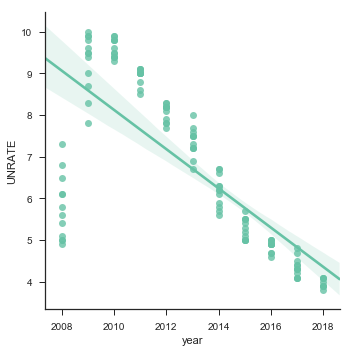

In [707]:
#Scatter plot
sns.lmplot(x="year", y="UNRATE", data=xlsxfile)

We see here and in the next several plots that during these ten years, unemployment rates seem to rise rapidly in 2008 and 2009, then begin to fall until in 2018, we see lower rates than we saw at the beginning of 2008. 

The regression line shows a strong negative correlation between years and unemployment.

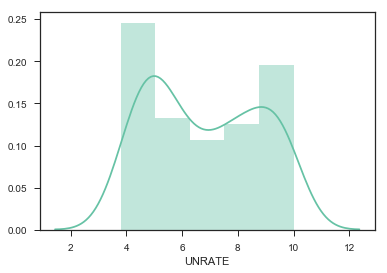

In [708]:
#Histogram
sns.distplot(xlsxfile.UNRATE, kde=True)

In this histogram, we see an interesting contrast to the csv file. In that file, the unemployment rate values were concentrated in the middle, around 6%. Here, we actually see rates concentrated along both extremes, between 4% and 5% and between 9% and 10%.

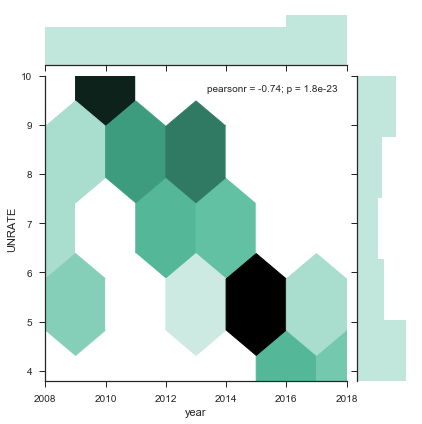

In [709]:
#Joint plot
sns.jointplot(xlsxfile.year, xlsxfile.UNRATE, kind="hex")

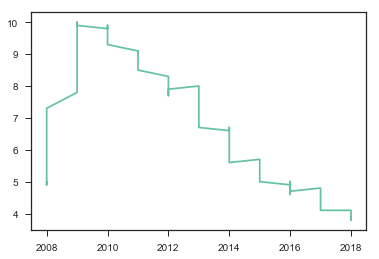

In [710]:
#Line chart
plt.plot(xlsxfile['year'],xlsxfile['UNRATE'])

Here we see lines traced out to estimate the changes in unemployment from year to year. This line graph shows us the same trend discussed above.

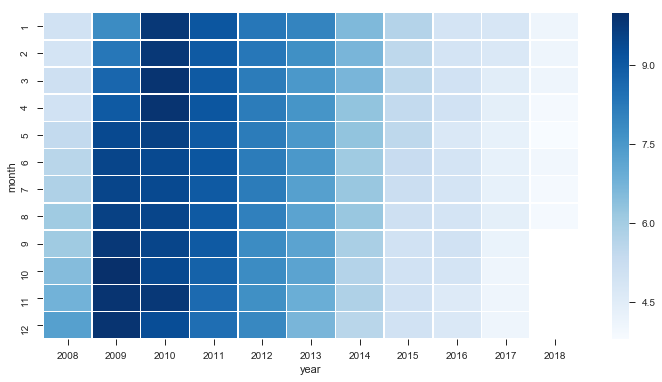

In [711]:
#Heat map
data = xlsxfile.pivot("month", "year", "UNRATE")
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(data, annot=False, linewidths=.5, ax=ax, cmap='Blues')

This heat map is very appealing to the eyes, in my opinion -- and is still easily intuitive. An extra advantage to this plot is that it shows months and years. It is clear that unemployment shot up between the end of 2008 and early 2009, and then it stayed high for years. Only in 2015 do unemployment levels return to the level they were at before the Recession.

### Cleaning The TXT File

We now begin to analyze our txt file. 

First, let's make it so the columns get their variables from the first row.

In [712]:
txtfile = var_adopt(txtfile)

txtfile[:3]

,id,year,population,total_arrests,homicide,rape,robbery,aggravated_assault,burglary,larceny,...,gambling,against_family,dui,liquor_laws,drunkenness,disorderly_conduct,vagrancy,other,suspicion,curfew_loitering
0,1,2016,323127513,10662252,11788,23632,95754,383977,207325,1050058,...,3705,88748,1017808,234899,376433,369733,24851,3254871,576,34176
1,2,2015,320896618,10797088,11092,22863,95572,376154,216010,1160390,...,4825,94837,1089171,266250,405880,386078,25151,3218880,1389,44802
2,3,2014,318907401,11205833,10571,21007,94403,372685,237974,1238190,...,5637,102336,1117852,321125,414854,436014,27380,3274430,1310,53654


Now let's look for missing values in the data.

In [713]:
txtfile.columns[txtfile.isnull().any()]

Index([], dtype='object', name=0)

There aren't any.

Let's make sure all variables become numbers.

In [714]:
for column in txtfile:
    txtfile[column] = to_num(txtfile[column])

Let's see if there are any outliers by finding summary statistics.

In [715]:
txtfile.describe()

,id,year,population,total_arrests,homicide,rape,robbery,aggravated_assault,burglary,larceny,...,gambling,against_family,dui,liquor_laws,drunkenness,disorderly_conduct,vagrancy,other,suspicion,curfew_loitering
count,22.000000,22.000000,2.200000e+01,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,...,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000
mean,11.500000,2005.500000,2.954876e+08,1.341823e+07,13709.772727,25204.818182,116045.136364,445464.500000,294936.136364,1.241126e+06,...,10735.636364,126231.227273,1.364988e+06,548852.500000,573148.681818,626903.181818,29909.272727,3.668659e+06,3908.772727,122665.590909
std,6.493587,6.493587,1.919792e+07,1.392651e+06,2912.708344,4860.891322,19499.984873,56195.439594,42463.215139,1.253835e+05,...,4169.950057,19901.431145,1.462664e+05,137009.398508,101261.364264,122980.514595,3545.170762,2.360012e+05,3035.430713,47405.287895
min,1.000000,1995.000000,2.628033e+08,1.066225e+07,10231.000000,16863.000000,94403.000000,358860.000000,207325.000000,1.050058e+06,...,3705.000000,88748.000000,1.017808e+06,234899.000000,376433.000000,369733.000000,24851.000000,3.218880e+06,576.000000,34176.000000
25%,6.250000,2000.250000,2.823958e+08,1.258691e+07,11347.750000,21701.250000,105863.000000,400402.250000,288660.500000,1.160498e+06,...,8899.750000,111937.500000,1.305198e+06,503683.500000,537817.500000,590411.500000,27316.250000,3.553687e+06,1451.000000,81405.750000
50%,11.500000,2005.500000,2.979528e+08,1.383975e+07,13331.000000,25031.500000,108921.000000,442990.500000,295372.500000,1.210490e+06,...,10630.500000,127032.000000,1.434117e+06,611335.000000,566726.500000,647346.500000,29075.500000,3.724251e+06,3018.000000,139116.500000
75%,16.750000,2010.750000,3.110234e+08,1.418057e+07,14134.000000,28083.250000,126437.500000,478265.000000,304564.000000,1.279616e+06,...,11915.750000,143487.250000,1.461434e+06,635713.500000,632832.500000,693571.250000,33055.750000,3.832337e+06,5561.500000,152130.250000
max,22.000000,2016.000000,3.231275e+08,1.528430e+07,21230.000000,34650.000000,171870.000000,568480.000000,386500.000000,1.530200e+06,...,21000.000000,155800.000000,1.511300e+06,683124.000000,734800.000000,842600.000000,36471.000000,4.022068e+06,12100.000000,187800.000000


There are so many variables that some variables are cut from the above table, so lets look at minimum and maximum of all the variables.

In [716]:
txtfile.max()

0
id                            22
year                        2016
population             323127513
total_arrests           15284300
homicide                   21230
rape                       34650
robbery                   171870
aggravated_assault        568480
burglary                  386500
larceny                  1530200
motor_vehicle_theft       191900
arson                      20000
violent_crime             796250
property_crime           2128600
other_assault            1395800
forgery                   122300
fraud                     465000
embezzlement               22381
stolen_property           166500
vandalism                 320900
weapons                   243900
prostitution              101600
other_sex_offenses        101900
drug_abuse               1889810
gambling                   21000
against_family            155800
dui                      1511300
liquor_laws               683124
drunkenness               734800
disorderly_conduct        842600
vagrancy

Seeing as this is crime data, these maxima are unfortunate, but they don't look too high. Just to test total_arrests, let's see what the value of 3 times total_arrest's standard deviation would be and add that to its mean.

In [717]:
std_dev = txtfile['total_arrests'].std()

max_outlier = txtfile['total_arrests'].mean() + (std_dev * 3)
max_outlier

17596178.778173972

This is greater than the maximum, so let's keep all our observations for total_arrests. Since no individual category comes near the total number's maximum, it makes sense that their maxima are correct, too.

Let's check the minima now.

In [718]:
txtfile.min()

0
id                             1
year                        1995
population             262803276
total_arrests           10662252
homicide                   10231
rape                       16863
robbery                    94403
aggravated_assault        358860
burglary                  207325
larceny                  1050058
motor_vehicle_theft        64566
arson                       8834
violent_crime             480360
property_crime           1353283
other_assault            1078808
forgery                    55333
fraud                     128531
embezzlement               15200
stolen_property            88576
vandalism                 191015
weapons                   137779
prostitution               38306
other_sex_offenses         51063
drug_abuse               1476100
gambling                    3705
against_family             88748
dui                      1017808
liquor_laws               234899
drunkenness               376433
disorderly_conduct        369733
vagrancy

Again, nothing calls my attention here. So, let's conclude that there are no outliers and continue with our analysis.

This file was pretty clean, but since we had to do some work in the beginning to get the variables right and we did a thorough check for outliers and missing values, let's move on to the description part of our analysis.

### Describing The TXT File

We've already seen summary statistics for the data, so let's look at the summary statistics using extreme percentiles.

In [719]:
txtfile.describe(percentiles=[.01,.05,.95,.99])

,id,year,population,total_arrests,homicide,rape,robbery,aggravated_assault,burglary,larceny,...,gambling,against_family,dui,liquor_laws,drunkenness,disorderly_conduct,vagrancy,other,suspicion,curfew_loitering
count,22.000000,22.000000,2.200000e+01,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,...,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000
mean,11.500000,2005.500000,2.954876e+08,1.341823e+07,13709.772727,25204.818182,116045.136364,445464.500000,294936.136364,1.241126e+06,...,10735.636364,126231.227273,1.364988e+06,548852.500000,573148.681818,626903.181818,29909.272727,3.668659e+06,3908.772727,122665.590909
std,6.493587,6.493587,1.919792e+07,1.392651e+06,2912.708344,4860.891322,19499.984873,56195.439594,42463.215139,1.253835e+05,...,4169.950057,19901.431145,1.462664e+05,137009.398508,101261.364264,122980.514595,3545.170762,2.360012e+05,3035.430713,47405.287895
min,1.000000,1995.000000,2.628033e+08,1.066225e+07,10231.000000,16863.000000,94403.000000,358860.000000,207325.000000,1.050058e+06,...,3705.000000,88748.000000,1.017808e+06,234899.000000,376433.000000,369733.000000,24851.000000,3.218880e+06,576.000000,34176.000000
1%,1.210000,1995.210000,2.633126e+08,1.069057e+07,10302.400000,17122.350000,94403.630000,361763.250000,209148.850000,1.056589e+06,...,3940.200000,90026.690000,1.032794e+06,241482.710000,382616.870000,373165.450000,24914.000000,3.226438e+06,685.200000,36407.460000
5%,2.050000,1996.050000,2.653563e+08,1.081753e+07,10584.050000,18167.650000,94464.300000,372858.450000,217108.200000,1.084353e+06,...,4865.600000,95157.500000,1.090605e+06,268993.750000,406328.700000,388574.800000,25181.200000,3.255849e+06,1099.500000,45244.600000
50%,11.500000,2005.500000,2.979528e+08,1.383975e+07,13331.000000,25031.500000,108921.000000,442990.500000,295372.500000,1.210490e+06,...,10630.500000,127032.000000,1.434117e+06,611335.000000,566726.500000,647346.500000,29075.500000,3.724251e+06,3018.000000,139116.500000
95%,20.950000,2014.950000,3.207972e+08,1.516568e+07,18983.500000,33000.500000,155079.000000,534252.500000,364360.000000,1.485615e+06,...,19320.000000,151130.000000,1.483091e+06,676425.000000,718280.000000,807975.000000,36276.400000,3.929597e+06,8829.050000,184980.000000
99%,21.790000,2015.790000,3.226590e+08,1.525990e+07,20765.900000,34314.000000,168594.000000,561432.400000,381943.000000,1.520981e+06,...,20685.000000,154834.000000,1.505440e+06,681921.960000,731419.000000,835985.000000,36456.930000,4.003146e+06,11427.790000,187233.000000
max,22.000000,2016.000000,3.231275e+08,1.528430e+07,21230.000000,34650.000000,171870.000000,568480.000000,386500.000000,1.530200e+06,...,21000.000000,155800.000000,1.511300e+06,683124.000000,734800.000000,842600.000000,36471.000000,4.022068e+06,12100.000000,187800.000000


Now let's take a look at correlations.

In [720]:
txtfile.corr()

,id,year,population,total_arrests,homicide,rape,robbery,aggravated_assault,burglary,larceny,...,gambling,against_family,dui,liquor_laws,drunkenness,disorderly_conduct,vagrancy,other,suspicion,curfew_loitering
0,,,,,,,,,,,,,,,,,,,,,
id,1.000000,-1.000000,-0.992584,0.890338,0.880018,0.900734,0.658444,0.967744,0.835063,0.478903,...,0.865829,0.966906,0.789881,0.828774,0.916819,0.833454,0.147673,0.694508,0.832845,0.927932
year,-1.000000,1.000000,0.992584,-0.890338,-0.880018,-0.900734,-0.658444,-0.967744,-0.835063,-0.478903,...,-0.865829,-0.966906,-0.789881,-0.828774,-0.916819,-0.833454,-0.147673,-0.694508,-0.832845,-0.927932
population,-0.992584,0.992584,1.000000,-0.858241,-0.906700,-0.918430,-0.666643,-0.971033,-0.828819,-0.526564,...,-0.860860,-0.949354,-0.736711,-0.773797,-0.914667,-0.802688,-0.077119,-0.646842,-0.831277,-0.903728
total_arrests,0.890338,-0.890338,-0.858241,1.000000,0.791212,0.729927,0.765745,0.875369,0.910900,0.464528,...,0.894282,0.877869,0.917533,0.936644,0.930498,0.976151,0.486790,0.932922,0.634529,0.957721
homicide,0.880018,-0.880018,-0.906700,0.791212,1.000000,0.929215,0.839154,0.948107,0.845295,0.658242,...,0.897034,0.765650,0.556392,0.586247,0.827336,0.760376,-0.036635,0.605672,0.772306,0.773450
rape,0.900734,-0.900734,-0.918430,0.729927,0.929215,1.000000,0.643581,0.941501,0.677947,0.427969,...,0.781583,0.822163,0.544923,0.590481,0.753885,0.658633,-0.045045,0.525797,0.821411,0.785332
robbery,0.658444,-0.658444,-0.666643,0.765745,0.839154,0.643581,1.000000,0.757026,0.883690,0.741159,...,0.903861,0.532855,0.564488,0.554979,0.748542,0.789876,0.151739,0.683758,0.516722,0.624986
aggravated_assault,0.967744,-0.967744,-0.971033,0.875369,0.948107,0.941501,0.757026,1.000000,0.854946,0.546541,...,0.888884,0.908539,0.719904,0.749788,0.905421,0.818754,0.078121,0.690531,0.839559,0.877784
burglary,0.835063,-0.835063,-0.828819,0.910900,0.845295,0.677947,0.883690,0.854946,1.000000,0.741764,...,0.948798,0.775453,0.757371,0.778144,0.920747,0.932188,0.249099,0.792831,0.627350,0.814163


This shows some good news! Total arrests, homicides, rapes, DUI's, and most other crimes are strongly, negatively correlated with year.

There is only one crime that is positively correlated with year. Drug abuse is weakly, but positively correlated with year. Which is certainly not good news.

There are also interesting relationships between crimes. Homicide, aggravated assault, and rape, for example are highly, positively correlated with each other. Again, the crime that seems to have the least correlation with other crimes is drug abuse.

I couldn't see the correlation between drug abuse and DUI. Let's look at that.

In [721]:
txtfile['drug_abuse'].corr(txtfile['dui'])

0.33056147217683501

So there is a positive relationship (about .33), but it's not nearly as strong as the ones I mentioned just above.

### Visualizing The TXT File

Now let's visualize the data in this file.

First, let's take a look at total arrests over time.

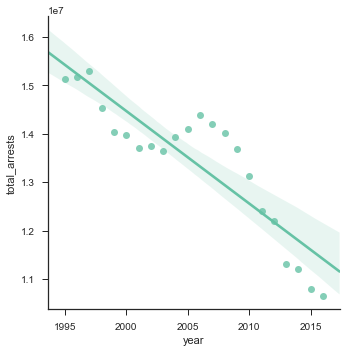

In [722]:
sns.lmplot(x="year", y="total_arrests", data=txtfile)

The path hasn't been perfectly smooth, but there is a clear decline in total_arrests over the given years.

Has the path of homicides over time been similar?

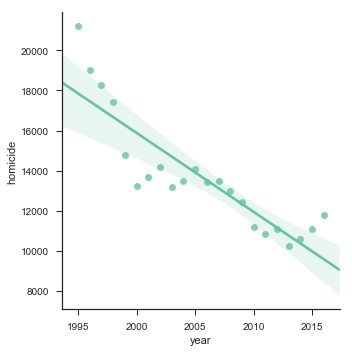

In [723]:
sns.lmplot(x="year", y="homicide", data=txtfile)

What about rapes?

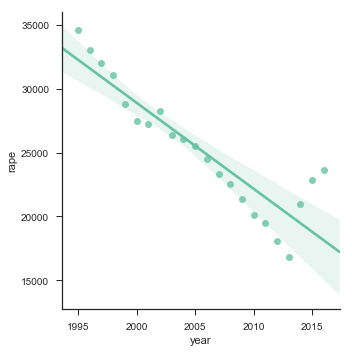

In [724]:
sns.lmplot(x="year", y="rape", data=txtfile)

Aggravated assault?

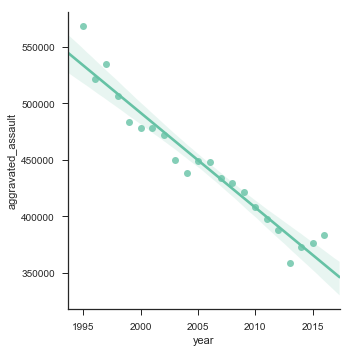

In [725]:
sns.lmplot(x="year", y="aggravated_assault", data=txtfile)

Notice that all three types of crimes follow the same downward trend as total arrests. That is, until about 2013, when all three jump up and continue to rise for the next three years. Could it be that we are on a new path towards more brutal crime, despite the fall in arrests?

Let's take a look at drug abuse now.

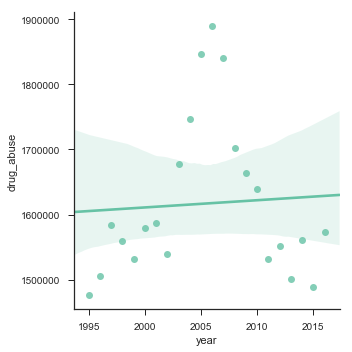

In [726]:
sns.lmplot(x="year", y="drug_abuse", data=txtfile)

That's a really interesting pattern. Let's look at a line graph of that trend.

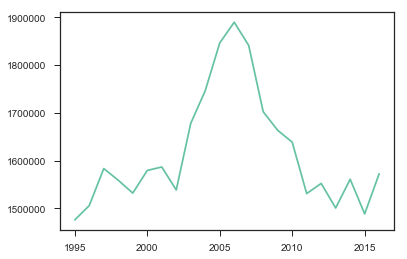

In [727]:
plt.plot(txtfile['year'],txtfile['drug_abuse'])

Now the trend is easier to discern. There seems to have been a huge spike in drug abuse arrests between about 2002 and 2011. Before and after that spike, there seems to be a trend to fluctuate between about 1.5 and 1.6 million cases. At the height of the spike, around 2006, there were nearly 1.9 million cases.

Hence, there is good news and bad news in this data. The good news is that arrests have been going down over the past decade, and that drug abuse has fallen from its peak.

The bad news is that drug abuse could rise again and has been somewhat positively correlated with time. Also, murders, rapes, and aggravated assaults have risen over the past 5 years, which is an extremely worrisome trend.